# Lab 05 : Train with mini-batches -- demo

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2026_codes/labs_lecture03/lab05_minibatch_training'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

# Warm up

### Make a random matrix with 5 rows 

In [3]:
A=torch.rand(5,3)
print(A)

tensor([[0.7997, 0.3230, 0.6820],
        [0.4406, 0.0111, 0.2889],
        [0.0461, 0.4893, 0.5282],
        [0.6237, 0.6626, 0.6021],
        [0.0083, 0.9415, 0.7183]])


### Choose at random two indices in {0,1,2,3,4}

In [5]:
indices=torch.LongTensor(2).random_(0,5) # generate an integer randomly from 0 to 5-1.
print(indices)

tensor([3, 4])


### Extract the corresponding rows of the matrix

In [6]:
minibatch=A[indices]
print(minibatch)

tensor([[0.6237, 0.6626, 0.6021],
        [0.0083, 0.9415, 0.7183]])


# Demo

### Download the data and print the sizes

In [7]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

In [8]:
train_data=torch.load(data_path+'mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [9]:
train_label=torch.load(data_path+'mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [10]:
test_data=torch.load(data_path+'mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [11]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        y = self.linear_layer(x)
        prob = torch.softmax(y, dim=1)
        return prob

### Build the net

In [12]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the size of the mini-batches 

In [13]:
bs=200

### Take the 6th image of the test set:

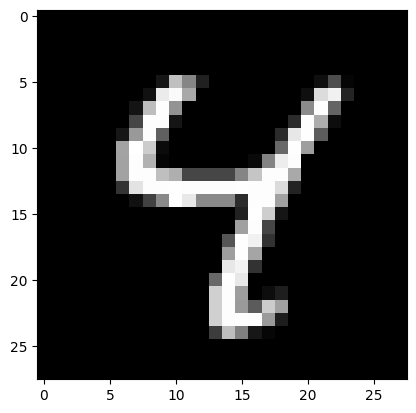

In [14]:
im=test_data[6]
utils.show(im)

### Feed it to the UNTRAINED network and print the confidence scores

In [15]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.1129, 0.0843, 0.0822, 0.0944, 0.1051, 0.1051, 0.0791, 0.1102, 0.1148,
         0.1119]], grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

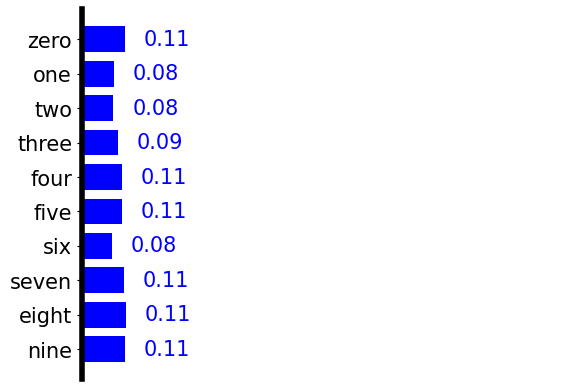

In [16]:
utils.show_prob_mnist(prob)

### Train the network (only 5000 iterations) on the train set

In [ ]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,60000) # The only difference compared to previous lab
    minibatch_data =  train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs=minibatch_data.view(bs,784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob=net(inputs) 
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

### Take the 6th image of the test set:

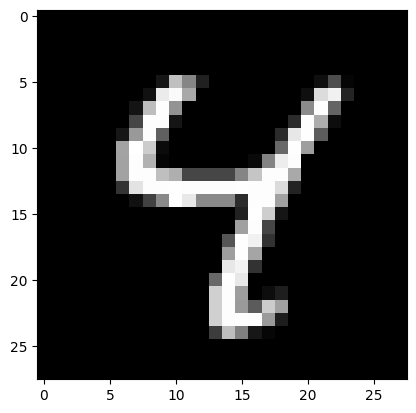

In [18]:
im=test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [19]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[2.5147e-04, 1.6875e-04, 2.0050e-04, 8.3405e-03, 8.3124e-01, 3.5060e-02,
         1.2166e-03, 1.6252e-02, 5.7356e-02, 4.9916e-02]],
       grad_fn=<SoftmaxBackward0>)


### Display visually the confidence scores

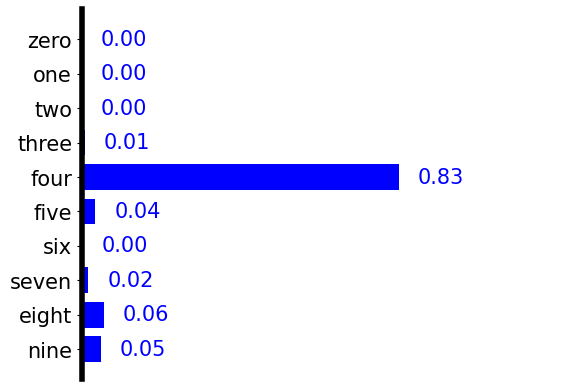

In [20]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

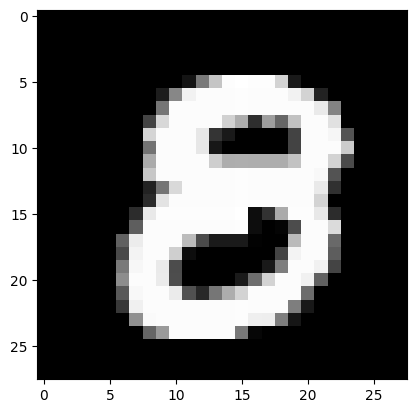

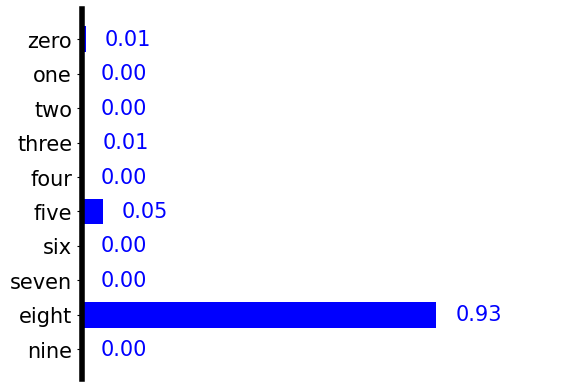

In [21]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_mnist(prob)